<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Базовый поток</b></h3>

<h2 style="text-align: center;"><b>Домашнее задание 3. Производная, градиент и градиентный спуск.
</b></h2>

In [1]:
from copy import copy, deepcopy

import numpy as np
import matplotlib.pyplot as plt

## Задание 1 ##

__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$


Если такой предел существует, то и производная существует (и равна этому пределу).

Какие из перечисленных функций имеют производную в нуле $(x_0 = 0)$?

1) $f(x) = |x|^2$

2) $f(x) = \frac{sin(x)}{x}$

3) $f(x) = |x|$

4) $f(x) = 
     \begin{cases}
       x^2 &\text{$x \ne 0$}\\
       0 &\text{$x = 0$}
     \end{cases}$

**Ответ:**

## Задание 2 ##

Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Тут надо действовать хитро. По определению взять не получится.

Ответ округлите до десятых.

**Ответ:**

## Задание 3 ##

Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

**Ответ:**

## Задание 4 ##

Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.

Ваше задание --- написать функцию, которая будет вычислять производную ... *кхм* функции. Тавтология --- это не очень приятно, но я думаю, что Вы поняли что нужно делать.

Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически. 

Попробуйте это сделать **приближенно**, опираясь на определение производной.

In [2]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        return (func(x + epsilon) - func(x)) / epsilon
    return deriv_func

In [3]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x ** 5 + x ** 3 - 5 * x ** 2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x ** 4 + 3 * x ** 2 - 10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x)) 
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label = "Истинная производная")
    plt.plot(grid, approx_deriv(grid), label = "Численное приближение")
    plt.legend()

print(str(right_flag))

True


## Задание 5 ##

В этом задании Вы должны найти минимум функций с помощью градиентного спуска.

Вам на вход подаются функция `func`, ее производная `deriv` **(*)**, а также начальная точка `start`, на выходе - точка локального минимума. Для вашего удобства мы написали функцию для отрисовки траектории градиентного спуска

**(*)** - вам не нужно будет ее вычислять. То, что вы написали в предыдущем задании, вам пригодится чуть позже.

In [4]:
def plot_convergence_1d(func, x_steps, y_steps, ax, grid = None, title = ""):
    """
    Функция отрисовки шагов градиентного спуска. 
    Не меняйте её код без необходимости! 
    :param func: функция, которая минимизируется градиентным спуском
    :param x_steps: np.array(float) — шаги алгоритма по оси Ox
    :param y_steps: np.array(float) — шаги алгоритма по оси Оу
    :param ax: холст для отрисовки графика
    :param grid: np.array(float) — точки отрисовки функции func
    :param title: str — заголовок графика
    """
    ax.set_title(title, fontsize = 16, fontweight = "bold")

    if grid is None:
        grid = np.linspace(np.min(x_steps), np.max(x_steps), 100)

    fgrid = func(grid)
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)

    arrow_kwargs = dict(linestyle = "--", color = "grey", alpha = 0.4)
    for i, _ in enumerate(x_steps):
        if i + 1 < len(x_steps):
            ax.arrow(
                x_steps[i], y_steps[i], 
                x_steps[i + 1] - x_steps[i],
                y_steps[i + 1] - y_steps[i], 
                **arrow_kwargs
            )

    n = len(x_steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(x_steps, y_steps, c = color_list)
    ax.scatter(x_steps[-1], y_steps[-1], c = "red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")


class LoggingCallback:
    """
    Класс для логирования шагов градиентного спуска. 
    Сохраняет точку (x, f(x)) на каждом шаге.
    Пример использования в коде: callback(x, f(x))
    """
    def __init__(self):
        self.x_steps = []
        self.y_steps = []

    def __call__(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)


def test_convergence_1d(grad_descent, test_cases, tol = 1e-2, axes = None, grid = None):
    """
    Функция для проверки корректности вашего решения в одномерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция (обязательно)
        - "deriv" — её производная (обязательно)
        - "start" — начальная точка start (м.б. None) (опционально) 
        - "low", "high" — диапазон для выбора начальной точки (опционально)
        - "answer" — ответ (обязательно)
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :param grid: np.array(float), точки на оси Ох для отрисовки тестов
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent(**test_input, callback = callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape = axes.shape)]
            x_steps = np.array(callback.x_steps)
            y_steps = np.array(callback.y_steps)
            plot_convergence_1d(
                test_input["func"], x_steps, y_steps, 
                ax, grid, key
            )
            ax.axvline(answer, 0, linestyle = "--", c = "red",
                        label = f"true answer = {answer}")
            ax.axvline(x_steps[-1], 0, linestyle = "--", c = "xkcd:tangerine", 
                        label = f"estimate = {np.round(x_steps[-1], 3)}")
            ax.legend(fontsize = 16)
        # Проверяем, что найдення точка достаточно близко к истинной
        if abs(answer - res_point) > tol:
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log

На каждой итерации вызывайте `callback(x, f(x))`, где `x` это результат шага градиентного спуска.   
Это нужно для отрисовки шагов алгоритма.

In [5]:
def grad_descent_v1(func, deriv, start = None, callback = None):
    """ 
    Реализация градиентного спуска для функций с одним локальным минимумом,
    совпадающим с глобальным. Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param start: float — начальная точка
    """
    if start is None:
        # Если точка не дана, сгенерируем случайную
        # из стандартного нормального распределения.
        # При таком подходе начальная точка может быть
        # любой, а не только из какого-то ограниченного диапазона
        np.random.seed(179)
        start = np.random.randn()

    estimate = start
    callback(estimate, func(estimate))  # не забывайте логировать шаги!
    
    lr = 0.01
    for i in range(10000):
        estimate -= lr * deriv(estimate)
        callback(estimate, func(estimate))
        if abs(deriv(estimate)) < 1e-4:
            break

    return estimate

Не сошлось. Дебажный вывод:
Тест 'fourth_power':
	- ответ: 1.0
	- вывод алгоритма: 0.964661093436816


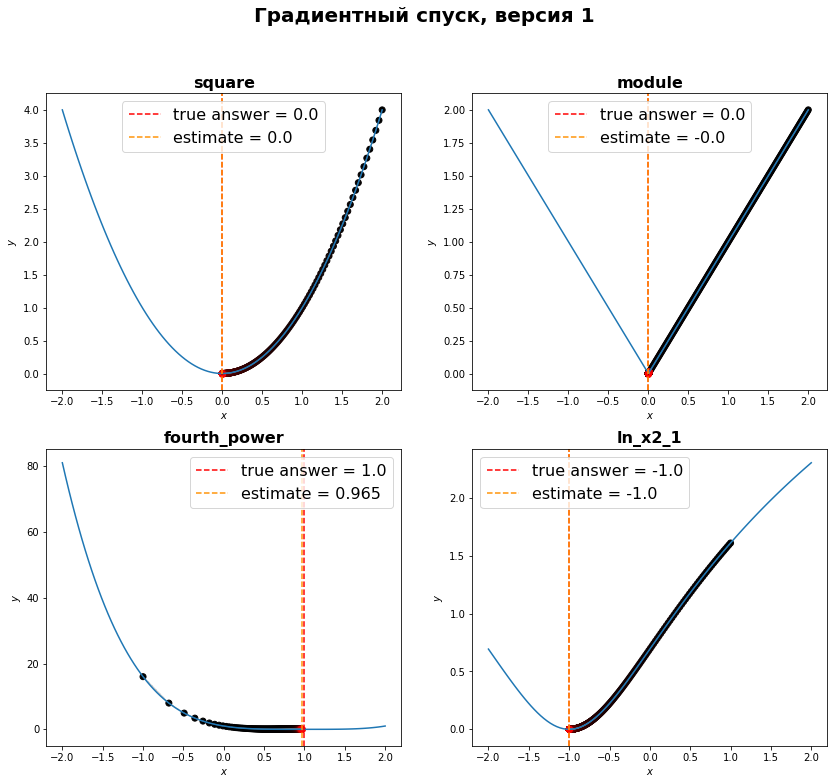

In [6]:
test_cases = {
    "square": {
        "func" : lambda x: x * x, 
        "deriv" : lambda x: 2 * x, 
        "start" : 2, 
        "answer" : 0.0
    },
    "module": {
        "func" : lambda x: abs(x),  
        "deriv" : lambda x: 1 if x > 0 else -1,
        "start" : 2, 
        "answer" : 0.0
    },
    "fourth_power": {
        "func" : lambda x: (x - 1) ** 4, 
        "deriv" : lambda x: 4 * (x - 1) ** 3, 
        "start" : -1, 
        "answer" : 1.0
    },
    "ln_x2_1": {
        "func" : lambda x: np.log((x + 1) ** 2 + 1),  
        "deriv" : lambda x: 2 * (x + 1) / (x ** 2 + 1), 
        "start" : 1, 
        "answer" : -1.0
    }
}

tol = 1e-4  # желаемая точность 
fig, axes = plt.subplots(2, 2, figsize = (14, 12))
fig.suptitle("Градиентный спуск, версия 1", fontweight = "bold", fontsize = 20)
grid = np.linspace(-2, 2, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v1, test_cases, tol, 
    axes, grid
)
if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

## Задание 6 ##

Это задание чуть сложнее. Если раньше Вам нужно было просто найти минимум у довольно хорошей функции, то сейчас в тестах будут плохие. У них будет несколько минимумов и вам нужно найти глобальный у каждой функции.

В общем случае такая задача невыполнима, но у вас будут одномерные функции и все самое интересное будет сосредоточено в районе нуля. Скажем, глобальный минимум будет лежать в пределах `(-3, 3)`. Вам нужно как-то изменить градиентный спуск, который вы написали в предыдущем задании, чтобы он работал и в таком случае.

И снова не забывайте вызывать `callback(x, f(x))` на каждом шаге алгоритма!

In [7]:
def grad_descent_v2(func, deriv, low = None, high = None, callback = None):
    """ 
    Реализация градиентного спуска для функций с несколькими локальным минимумами,
    но с известной окрестностью глобального минимума. 
    Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param low: float — левая граница окрестности
    :param high: float — правая граница окрестности
    """
    
    #estimate = start
    #callback(estimate, func(estimate))  # не забывайте логировать шаги!
    res = []
    lr = 0.01
    start = high - 1
    #best_estimate = high
    for j in range(8):
        estimate = np.random.uniform(low + 1, high - 1)
        callback(estimate, func(estimate)) 
        while True:
            estimate -= lr * deriv(estimate)
            callback(estimate, func(estimate))
            if abs(deriv(estimate)) < 1e-2:
                res.append(estimate)
                break
    best_estimate = min(res, key = lambda x: func(x))

    return best_estimate

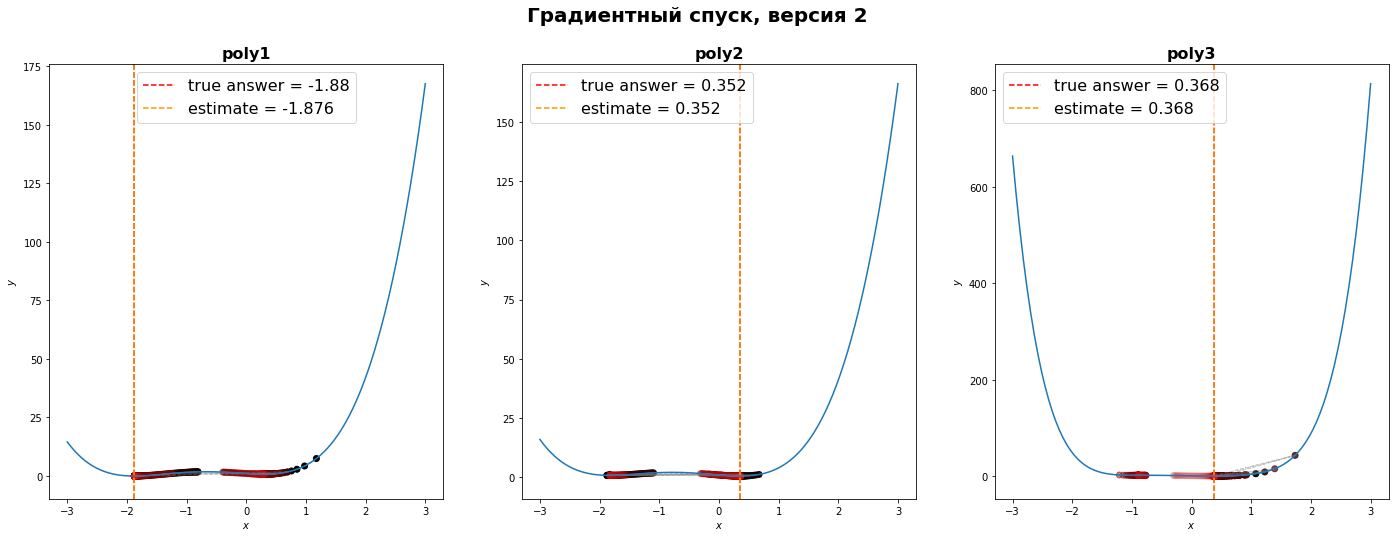

In [8]:
test_cases = {
    "poly1" : {
        "func" : lambda x: x ** 4 + 3 * x ** 3 + x ** 2 - 1.5 * x + 1,
        "deriv" : lambda x: 4 * x ** 3 + 9 * x ** 2 + 2 * x - 1.5,
        "low" : -3, "high" : 3, "answer" : -1.88
    },
    "poly2" : {
        "func" : lambda x: x ** 4 + 3 * x ** 3 + x ** 2 - 2 * x + 1.0,
        "deriv" : lambda x: 4 * x ** 3 + 9 * x ** 2 + 2 * x - 2.0, 
        "low" : -3, "high" : 3, "answer" : 0.352
    },
    "poly3" : {
        "func" : lambda x: x ** 6 + 3 * x ** 3 + x ** 2 - 2 * x + 1.0,
        "deriv" : lambda x: 6 * x ** 5 + 9 * x ** 2 + 2 * x - 2.0, 
        "low" : -3, "high" : 3, "answer" : 0.368
    }
}
tol = 1e-2 # желаемая точность

fig, axes = plt.subplots(1, 3, figsize = (24, 8))
fig.suptitle("Градиентный спуск, версия 2", fontweight = "bold", fontsize = 20)
grid = np.linspace(-3, 3, 100)

is_correct, debug_log = test_convergence_1d(grad_descent_v2, test_cases, tol, axes, grid)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

## Задание 7 ##

__Напоминание:__
Если вдруг вы не знаете или не помните дифференциальное исчисление функций многих переменных, то вот несколько ключевых определений, которые помогут вам.справиться с заданиями 7-9. Здесь и ниже рассматриваются скалярные функции многих переменных, т.е. $f: U \to \mathbb{R} $, где $U$ — область в $\mathbb{R}^{n}$. 

__Определение: Производная функции многих переменных__ 

$$\lim_{\|h\|→0}\frac{f(x_0+h)−f(x_0)}{\|h\|}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{\|x-x_0\|}$$

Если такой предел существует, то и производная в точке $x_0$ существует (и равна этому пределу).

__Определение: Производная по направлению__ 

Пусть зафиксирован единичный вектор $v$. Тогда если в точке $x_0$ существует предел
$$\lim_{\alpha→0}\frac{f(x_0+\alpha v)−f(x_0)}{\alpha}$$
то он называется производной по направлению $v$ в этой точке. Обозначается через $\nabla_{v} f(x_0)$.

__Определение: Частная производная__

Производная по направлению, заданному одним из базисных векторов $\langle e_1, \ldots, e_n \rangle$.  
Частная производная по направлению $e_i$ обозначается через $\frac{\partial f}{\partial x_i}$.

__Определение: Градиент__

Ковектор, составленный из частных производных
$\nabla f := \left( \frac{\partial f}{\partial x_1}, \ldots, \frac{\partial f}{\partial x_1} \right) $

---

В лекции было несколько функций, чьи градиенты Вам было предложено вычислить.

Вычислите градиент следующей функции:

$\psi(x,y,z) = sin(xz) - y^2z + e^x$

Запишите ответ в виде строки "$(\psi_{x}^{'})*i + (\psi_{y}^{'})*j + (\psi_{z}^{'})*k$", где вместо $\psi_{x}^{'}, \psi_{y}^{'}, \psi_{z}^{'}$  подставьте вычисленные частные производные (компоненты градиента). 

Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e". 

Примеры записи формул можно увидеть в ячейках текста задания.

**Ответ:**

## Задание 8 ##

Еще один градиент, похожий на тот, что был на лекции:

$\psi(x,y,z) = ln(cos(e^{x+y})) - ln(xy)$ 

Запишите ответ в виде строки "$(\psi_{x}^{'})*i + (\psi_{y}^{'})*j + (\psi_{z}^{'})*k$", где вместо $\psi_{x}^{'}, \psi_{y}^{'}, \psi_{z}^{'}$  подставьте вычисленные частные производные (компоненты градиента). 

Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e". 

Примеры записи формул можно увидеть в ячейках текста задания.

Запишите ответ в виде строки "()*i + ()*j", где вместо ,  подставьте вычисленные производные (компоненты градиента). Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e", "ln", "tg"

**Ответ:**

## Задание 9 ##

А теперь все вместе!

У вас есть только функция, которую Вам отдают в качестве аргумента и вы должны найти её минимум.

Вы будете искать глобальный, у вас это должно получиться лишь потому что тут они хорошие.

Да, и еще, теперь они не одномерные, а двумерные.

Минимум нужно искать где-то на $\Omega = (-5, 5) \times (-5, 5)$

***Подсказка*** можете использовать следующие параметры:

* Точность при вычислении производной $dx = 10^{-10}$
* Критерий остановки - близость к ответу $\delta = 10^{-10}$ и кол-во итераций $10^4$
* Длина шага градиентного спуска $lr = 1$

И вновь мы предоставляем функцию отрисовки шагов для пущего удобства.

In [9]:
def plot_convergence_2d(func, steps, ax, xlim, ylim, cmap="viridis", title=""):
    """
    Функция отрисовки шагов градиентного спуска. 
    Не меняйте её код без необходимости! 
    :param func: функция, которая минимизируется градиентным спуском
    :param steps: np.array(), N x 2 — шаги алгоритма
    :param ax: холст для отрисовки графика
    :param xlim: tuple(float), 2 — диапазон по первой оси
    :param ylim: tuple(float), 2 — диапазон по второй оси
    :param cmap: str — название палитры
    :param title: str — заголовок графика
    """

    ax.set_title(title, fontsize=20, fontweight="bold")
    # Отрисовка значений функции на фоне
    xrange = np.linspace(*xlim, 100)
    yrange = np.linspace(*ylim, 100)
    grid = np.meshgrid(xrange, yrange)
    X, Y = grid
    fvalues = func(
        np.dstack(grid).reshape(-1, 2)
    ).reshape((xrange.size, yrange.size))
    ax.pcolormesh(xrange, yrange, fvalues, cmap=cmap, alpha=0.8)
    CS = ax.contour(xrange, yrange, fvalues)
    ax.clabel(CS, CS.levels, inline=True)
    # Отрисовка шагов алгоритма в виде стрелочек
    arrow_kwargs = dict(linestyle="--", color="black", alpha=0.8)
    for i, _ in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                *steps[i],
                *(steps[i+1] - steps[i]),
                **arrow_kwargs
            )
    # Отрисовка шагов алгоритма в виде точек
    n = len(steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(steps[:, 0], steps[:, 1], c=color_list, zorder=10)
    ax.scatter(steps[-1, 0], steps[-1, 1], 
               color="red", label=f"estimate = {np.round(steps[-1], 2)}")
    # Финальное оформление графиков
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel("$y$")
    ax.set_xlabel("$x$")
    ax.legend(fontsize=16)

In [10]:
def test_convergence_2d(grad_descent_2d, test_cases, tol, axes=None):
    """
    Функция для проверки корректности вашего решения в двумерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent_2d: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция 
        - "deriv" — её производная 
        - "low", "high" — диапазон для выбора начальной точки 
        - "answer" — ответ 
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent_2d(**test_input, callback=callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            plot_convergence_2d(
                np.vectorize(test_input["func"], signature="(n)->()"), 
                np.vstack(callback.x_steps), 
                ax=ax, 
                xlim=(test_input["low"], test_input["high"]), 
                ylim=(test_input["low"], test_input["high"]),
                title=key
            )   
        # Проверяем, что найденная точка достаточно близко к истинной
        if np.linalg.norm(answer - res_point, ord=1) > tol:
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log

In [120]:
def numerical_derivative_2d(func, epsilon):
    """
    Функция для приближённого вычисления градиента функции двух переменных. 
    :param func: np.ndarray -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по осям
    :return: другая функция, которая приближённо вычисляет градиент в точке
    """
    def grad_func(x):
        """
        :param x: np.ndarray — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        new_x_1 = np.array([x[0] + epsilon, x[1]])
        deriv_1 = (func(new_x_1) - func(x)) / epsilon
        new_x_2 = np.array([x[0], x[1] + epsilon])
        deriv_2 = (func(new_x_2) - func(x)) / epsilon
        return np.array([deriv_1, deriv_2])
    return grad_func


def grad_descent_2d(func, low, high, callback = None):
    """ 
    Реализация градиентного спуска для функций двух переменных 
    с несколькими локальным минимумами, но известной квадратной окрестностью
    глобального минимума. Все тесты будут иметь такую природу.

    Обратите внимание, что здесь градиент функции не дан.
    Его нужно вычислять приближённо.

    :param func: np.ndarray -> float — функция 
    :param low: левая граница интервала по каждой из осей
    :param high: правая граница интервала по каждой из осей
    """
    res = []
    lr = 1
    epsilon = 1e-2
    #estimate_0 = np.array([0, 0])
    #estimate_0 = np.linspace(-5, 5, 10000)
    estimate_0 = np.linspace(-5, 5, 10000)
    #start = list(high - 1, high - 1)
    #best_estimate = high
    for j in range(10000):
        #estimate = np.array([0, 0])
        #estimate[0] = np.random.uniform(low + 1, high - 1)
        #estimate[1] = np.random.uniform(low + 1, high - 1)
        estimate_0[0] = estimate_0[j]
        estimate_0[1] = estimate_0[j]
        estimate = np.array([estimate_0[0], estimate_0[1]])
        callback(estimate, func(estimate)) 
        while estimate_0[0] < 5 and estimate_0[1] < 5:
            deriv = numerical_derivative_2d(func, epsilon)(estimate)
            estimate[0] -= lr * deriv[0]
            estimate[1] -= lr * deriv[1]
            estimate = np.array([estimate[0], estimate[1]])
            callback(estimate, func(estimate))
            deriv = numerical_derivative_2d(func, epsilon)(estimate)
            if abs(deriv[0]) < 1 and abs(deriv[1]) < 1:
                res.append(estimate)
                break
    best_estimate = min(res, key = lambda x: func(x))

    return best_estimate

Не сошлось. Дебажный вывод:
Тест 'concentric_circles':
	- ответ: [1.  1.5]
	- вывод алгоритма: [0.99326079 1.50017807]


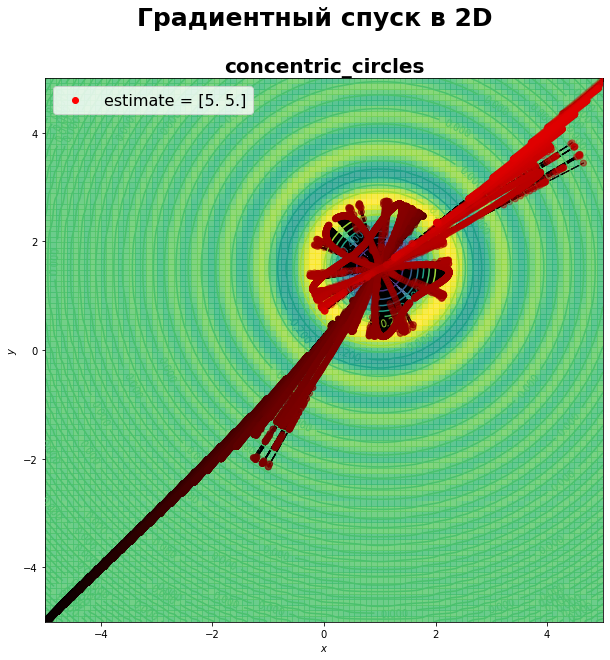

In [121]:
test_cases = {
    "concentric_circles" : {
        "func" : lambda x: (-1 / ((x[0] - 1) ** 2 + (x[1] - 1.5) ** 2 + 1) * np.cos(2 * (x[0] - 1) ** 2 + 2 * (x[1] - 1.5) ** 2)),
        "low" : -5,
        "high" : 5,
        "answer" : np.array([1, 1.5])
    }
}
tol = 1e-3  # желаемая точность

fig, axes = plt.subplots(figsize = (10, 10), squeeze = False)
fig.suptitle("Градиентный спуск в 2D", fontsize = 25, fontweight = "bold")
is_correct, debug_log = test_convergence_2d(grad_descent_2d, test_cases, tol, axes)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)